# Random Forest Classification


Our goal is to create a model that can help predict a species of a penguin based on physical attributes,
then we can use that model to help researchers classify penguins in the field, instead of needing an
experienced biologist. The dataset penguins_size.csv contains the following information


* Target:
    * species           | penguin species (Chinstrap, Adélie, or Gentoo)  |
* Features:
    * island            | island name (Dream, Torgersen, or Biscoe)       |
    * culmen_length_mm  | length (mm) of the upper ridge of a bird's beak |
    * culmen_depth_mm   | depth (mm) of the upper ridge of a bird's beak  |
    * flipper_length_mm | flipper length (mm)                             |
    * body_mass_g       | body mass (g)                                   |
    * sex               | penguin sex (MALE, FEMALE)                      |

In [118]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt

In [119]:
df = pd.read_csv('../RFC/penguins.csv')

In [120]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [121]:
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [122]:
(df.loc[df['sex'].isnull()]).head(15)
df=df.drop(columns=['rowid','year'])

In [123]:
df1=df.dropna(subset=['body_mass_g'])
df1.head(15)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN


In [124]:
df1.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

### since the last missing variables are gender, we can fill it in with the average

In [125]:
df2 = df1.fillna(df1.mean(numeric_only=True))

In [126]:
df2['sex'].unique()

array(['male', 'female', nan], dtype=object)

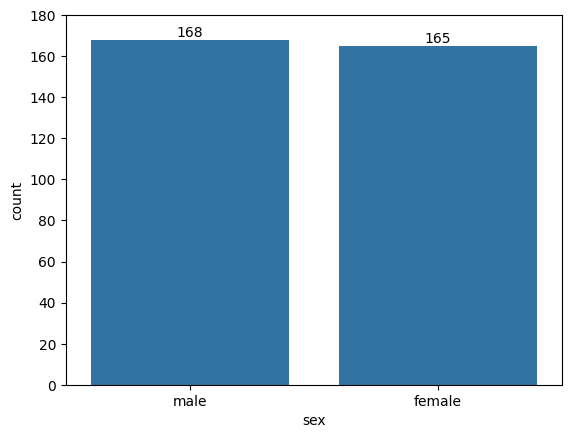

In [127]:
ax=sb.countplot(x='sex',data=df2,order=['male','female'])

ax.set_ylim(0,180)

for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='sex', ylabel='body_mass_g'>

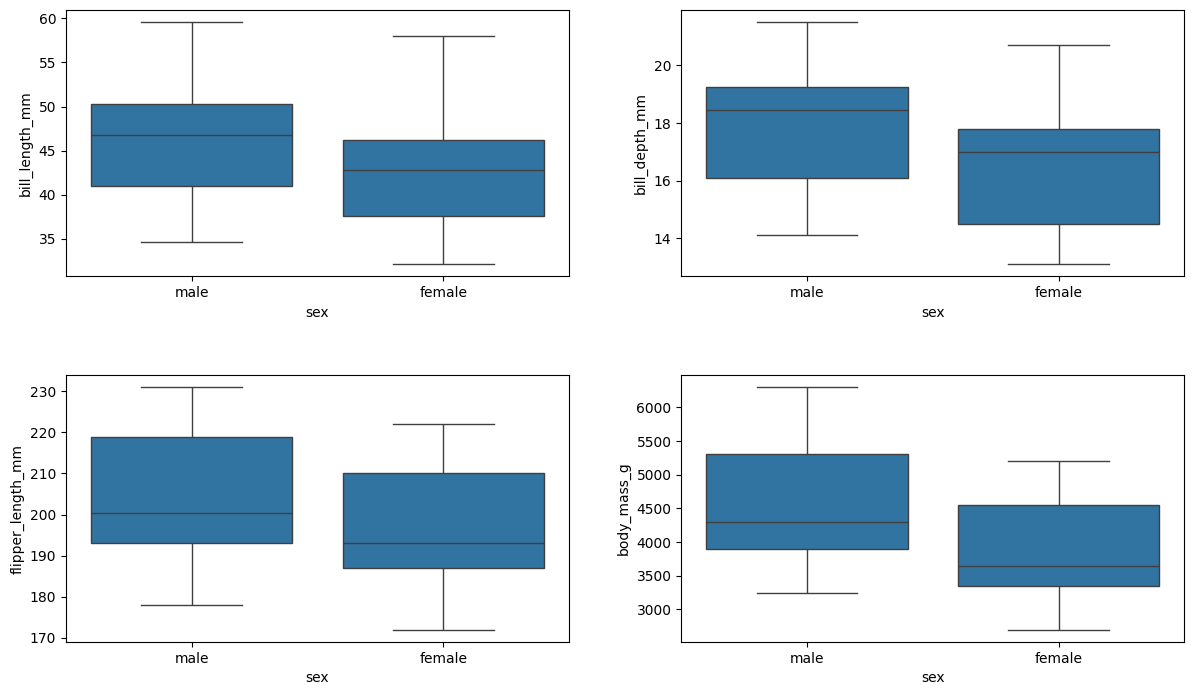

In [128]:
dfmr= df2.dropna()

fig,axes=plt.subplots(2,2,figsize=(13,8))
fig.tight_layout(pad=5.0)

##sb.boxplot(ax=axes[0][0], x = 'gender', y = 'island', data=dfmr, order=['MALE','FEMALE','.'])
sb.boxplot(ax=axes[0][0], x = 'sex', y = 'bill_length_mm', data=dfmr, order=['male','female'])
sb.boxplot(ax=axes[0][1], x = 'sex', y = 'bill_depth_mm', data=dfmr, order=['male','female'])
sb.boxplot(ax=axes[1][0], x = 'sex', y = 'flipper_length_mm', data=dfmr, order=['male','female'])
sb.boxplot(ax=axes[1][1], x = 'sex', y = 'body_mass_g', data=dfmr, order=['male','female'])


In [129]:
(df2.loc[df2['sex'].isnull()]).head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [130]:
df2.at[8,'sex']='female'
df2.at[9,'sex']='female'
df2.at[10,'sex']='female'
df2.at[11,'sex']='female'
df2.at[47,'sex']='female'
df2.at[178,'sex']='male'
df2.at[218,'sex']='male'
df2.at[256,'sex']='male'
df2.at[268,'sex']='male'




In [131]:
df2.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [132]:
df2 = pd.get_dummies(df2, columns=['sex'], drop_first=True)
df2['sex_male']=df2['sex_male'].map({True: 1,False: 0})

In [133]:
x = df2.iloc[:, 2:].values
y = df2.iloc[:,0].values



In [134]:

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.2,random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrainfs=sc.fit_transform(xtrain)
xtestfs=sc.fit_transform(xtest)



In [135]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrainfs,ytrain)

RandomForestClassifier()

In [136]:
ypred=rfc.predict(xtestfs)
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9855072463768116

### The Model fits data with 98% accuracy


In [138]:
penguin1 = sc.transform([[46.3,18,189,3400,0]])
penguin2 = sc.transform([[49.5,16.5,230,6200,1]])

In [139]:
if rfc.predict(penguin1).__eq__('Adelie'):
    print('penguin 1 is and Adelie.')
elif rfc.predict(penguin1).__eq__('Chinstrap'):
    print('penguin 1 is a chinstrap')
else:
    print('Penguin 1 is a gentoo')
    
if rfc.predict(penguin2).__eq__('Adelie'):
    print('penguin 1 is and Adelie.')
elif rfc.predict(penguin2).__eq__('Chinstrap'):
    print('penguin 1 is a chinstrap')
else:
    print('Penguin 1 is a gentoo')
    

penguin 1 is a chinstrap
Penguin 1 is a gentoo
